In [9]:
import numpy as np
import matplotlib.pyplot as plt
import sys

import time
import matplotlib.pyplot as plt
from pydae.svg_tools import svg,grid2svg
from IPython.core.display import HTML,SVG
import pydae.grid_tools as gt
import scipy.optimize as sopt
import pandas as pd
from scipy.optimize import NonlinearConstraint

import pydae.plot_tools as pplt
colors = pplt.set_style(plt)

In [10]:
import cigre_eu_lv_acdc
import cigre_eu_lv_acdc_opt
import cigre_eu_lv_acdc_tools as tools

In [11]:
%matplotlib widget

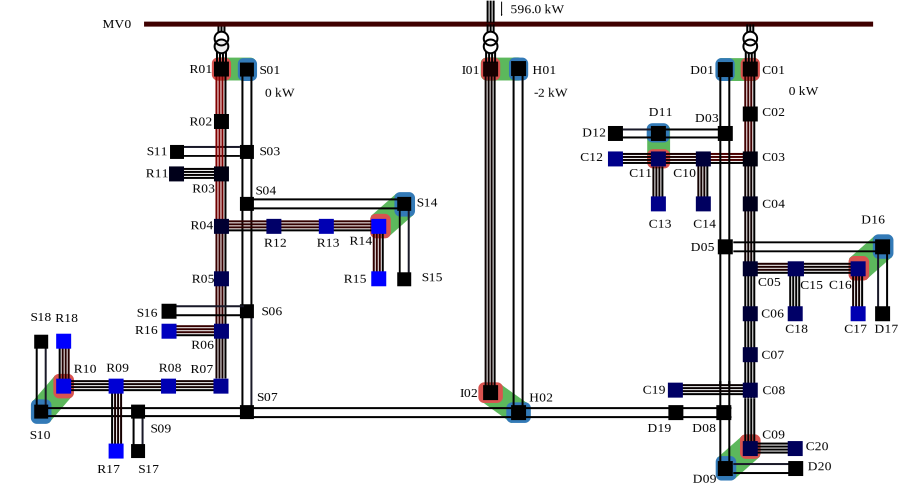

In [12]:
params = {'v_MV0_a_r':1.025* 11547.00,
'v_MV0_a_i':1.025*     0.00,
'v_MV0_b_r':1.025* -5773.50,
'v_MV0_b_i':1.025*-10000.00,
'v_MV0_c_r':1.025* -5773.50,
'v_MV0_c_i':1.025* 10000.00}

excel_file = '../cigre_lv.xlsx'
load = tools.loads()
load.case = 'Case 0'
load.read(excel_file)
load.set_loads(20,params)

params_case_1 = {'p_vsc_R01':-80e3, 'p_vsc_C01':-80e3, 
                 'p_vsc_R10':90e3, 'coef_a_R10':1/3,'coef_b_R10':1/3,'coef_c_R10':1/3,
                 'p_vsc_R14':60e3, 'coef_a_R14':1/3,'coef_b_R14':1/3,'coef_c_R14':1/3,
                 'p_vsc_C09':10e3, 'coef_a_C09':1/3,'coef_b_C09':1/3,'coef_c_C09':1/3,
                 'p_vsc_C11':40e3, 'coef_a_C11':1/3,'coef_b_C11':1/3,'coef_c_C11':1/3,
                 'p_vsc_C16':50e3, 'coef_a_C16':1/3,'coef_b_C16':1/3,'coef_c_C16':1/3,}

params_case_2 = {'p_vsc_R01':-100e3, 'p_vsc_C01':-100e3, 
                 'p_vsc_R10':50e3, 'coef_a_R10':1/3,'coef_b_R10':1/3,'coef_c_R10':1/3,
                 'p_vsc_R14':20e3, 'coef_a_R14':1/3,'coef_b_R14':1/3,'coef_c_R14':1/3,
                 'p_vsc_C09':10e3, 'coef_a_C09':1/3,'coef_b_C09':1/3,'coef_c_C09':1/3,
                 'p_vsc_C11':20e3, 'coef_a_C11':1/3,'coef_b_C11':1/3,'coef_c_C11':1/3,
                 'p_vsc_C16':10e3, 'coef_a_C16':1/3,'coef_b_C16':1/3,'coef_c_C16':1/3,}

params_case_3 = {'p_vsc_R01':-150e3, 'p_vsc_C01':-150e3, 
                 'p_vsc_R10':50e3, 'coef_a_R10':1,'coef_b_R10':0.0,'coef_c_R10':0.0,
                 'p_vsc_R14':20e3, 'coef_a_R14':1,'coef_b_R14':0.0,'coef_c_R14':0.0,
                 'p_vsc_C09':10e3, 'coef_a_C09':1,'coef_b_C09':0.0,'coef_c_C09':0.0,
                 'p_vsc_C11':20e3, 'coef_a_C11':1,'coef_b_C11':0.0,'coef_c_C11':0.0,
                 'p_vsc_C16':10e3, 'coef_a_C16':1,'coef_b_C16':0.0,'coef_c_C16':0.0,}

if load.case == 'Case 1': params.update(params_case_1)
if load.case == 'Case 2': params.update(params_case_2)
if load.case == 'Case 3': params.update(params_case_3)

grid = cigre_eu_lv_acdc.model()
grid.ini(params,'xy_0_case2.json')
s = svg('./figs/cigre_eu_lv_acdc_v2.svg')
s.set_grid(grid,'cigre_eu_lv_acdc.json')
s.set_text('VSC_R01_S01_P',f"{grid.get_value('p_vsc_S01')/1000:2.0f} kW")
s.set_text('VSC_I01_H01_P',f"{grid.get_value('p_vsc_H01')/1000:2.0f} kW")
s.set_text('VSC_C01_D01_P',f"{grid.get_value('p_vsc_D01')/1000:2.0f} kW")
S_grid = tools.get_head_power(grid)
s.set_text('MV0_P',f"{S_grid.real/1000:5.1f} kW")
s.set_tooltips('case_2_opt.svg')    
SVG('case_2_opt.svg')

In [13]:
grid.report_params()

a_R01 = 2.92
b_R01 = 0.45
c_R01 = 0.03
coef_a_R01 = 0.33
coef_b_R01 = 0.33
coef_c_R01 = 0.33
a_R10 = 2.92
b_R10 = 0.45
c_R10 = 0.03
coef_a_R10 = 0.33
coef_b_R10 = 0.33
coef_c_R10 = 0.33
a_R14 = 2.92
b_R14 = 0.45
c_R14 = 0.03
coef_a_R14 = 0.33
coef_b_R14 = 0.33
coef_c_R14 = 0.33
a_I01 = 2.92
b_I01 = 0.45
c_I01 = 0.03
C_a_I01 = 0.33
C_b_I01 = 0.33
C_c_I01 = 0.33
R_dc_H01 = 0.00
K_dc_H01 = 0.00
a_I02 = 2.92
b_I02 = 0.45
c_I02 = 0.03
coef_a_I02 = 0.33
coef_b_I02 = 0.33
coef_c_I02 = 0.33
a_C01 = 2.92
b_C01 = 0.45
c_C01 = 0.03
coef_a_C01 = 0.33
coef_b_C01 = 0.33
coef_c_C01 = 0.33
a_C09 = 2.92
b_C09 = 0.45
c_C09 = 0.03
coef_a_C09 = 0.33
coef_b_C09 = 0.33
coef_c_C09 = 0.33
a_C11 = 2.92
b_C11 = 0.45
c_C11 = 0.03
coef_a_C11 = 0.33
coef_b_C11 = 0.33
coef_c_C11 = 0.33
a_C16 = 2.92
b_C16 = 0.45
c_C16 = 0.03
coef_a_C16 = 0.33
coef_b_C16 = 0.33
coef_c_C16 = 0.33


In [14]:
class opt_class:
    
    def __init__(self,grid):
        self.grid = grid    
        self.x_0 = []      
        self.bounds = []
        self.obj = ''
        self.cons_var_1 = ''
        
        self.t = 0.0       
        self.obj_evals = 0
        self.compute_jac = False
        self.method = 'SLSQP'
        self.grid.I_res_t_max = 720.0*1.5
        self.grid.I_ind_t_max = 210.0*1.5
        self.grid.I_com_t_max = 430.0*1.5
        
    def set_inputs(self,inputs):

        self.x_0 = [item['ini'] for item in  inputs ]
        self.bounds = [(item['min'],item['max']) for item in  inputs]
        self.inputs_id = [item['id'] for item in inputs]
        
        inputs_run_list = self.grid.inputs_run_list
        
        #self.idx_u = [inputs_run_list.index(item['id']) for item in inputs]

        params = self.grid.params
        
        u = self.x_0
        
        self.update_inputs(u)
        self.grid.ini(params)

    def update_inputs(self,u):

        it = 0
        new_params = {}
        for u_id in self.inputs_id:

            if u_id == 'coef_a_R01':
                coef_a_R01 = u[it]
                coef_b_R01 = (1-coef_a_R01)/2
                coef_c_R01 = (1-coef_a_R01)/2
                new_params.update({'coef_a_R01':coef_a_R01})
                new_params.update({'coef_b_R01':coef_b_R01})
                new_params.update({'coef_c_R01':coef_c_R01})
                continue
            if u_id == 'C_a_I01':
                coef_a_I01 = u[it]
                coef_b_I01 = (1-coef_a_I01)/2
                coef_c_I01 = (1-coef_a_I01)/2
                new_params.update({'C_a_I01':coef_a_I01})
                new_params.update({'C_b_I01':coef_b_I01})
                new_params.update({'C_c_I01':coef_c_I01})  
                continue
            if u_id == 'coef_a_C01':
                coef_a_C01 = u[it]
                coef_b_C01 = (1-coef_a_C01)/2
                coef_c_C01 = (1-coef_a_C01)/2
                new_params.update({'coef_a_C01':coef_a_C01})
                new_params.update({'coef_b_C01':coef_b_C01})
                new_params.update({'coef_c_C01':coef_c_C01})  
                continue
            
            new_params.update({u_id:u[it]})
            
            it+=1
            
        self.new_params = new_params    
        print(new_params)
        self.grid.params.update(new_params)

            
        #self.idx_z = grid.outputs_list.index('p_t_AC1_AC2_1')

        
        
    def optimize(self):
            
        #res = sopt.minimize(opt.obj_eval, x0, method='trust-constr', bounds=bounds)  # SLSQP, Powell, COBYLA,trust-constr
        cons_1 = {'type':'ineq','fun':self.cons_res}
        cons_2 = {'type':'ineq','fun':self.cons_ind}
        cons_3 = {'type':'ineq','fun':self.cons_com}
        
        #nlc = NonlinearConstraint(self.cons_1, -30, 30)

        
        cons = [cons_1,cons_2,cons_3]

        #res = sopt.minimize(opt.obj_eval, self.x_0, method='SLSQP', bounds=self.bounds, constraints=cons)  #
        #res = sopt.minimize(opt.obj_eval, self.x_0, method='SLSQP', bounds=self.bounds, constraints=cons)  #
        if self.compute_jac:
            res = sopt.minimize(self.obj_eval, self.x_0, method=self.method, bounds=self.bounds, jac=self.jac_eval, constraints=cons)  #
        else:
            res = sopt.minimize(self.obj_eval, self.x_0, method=self.method, bounds=self.bounds, constraints=cons)  #
        #SLSQP, Powell,trust-constr
        
        self.res = res
        self.x_0 = res.x 
        return res.x
    
    def jac_eval(self,u):
        self.grid.eval_jac_u2z()
        self.idx_z = self.grid.outputs_list.index(self.obj)
               
        return self.grid.jac_u2z[self.idx_z,self.idx_u].toarray()
        
 
    def obj_eval(self,u):
        
        self.obj_evals +=1
        
        
        
        #print(new_params)
        self.update_inputs(u)
        params = self.grid.params
        
        self.grid.ini(params)
        p_total = self.grid.get_value(self.obj)
        
        buses_v = ['R10','R14','C09','C11','C16']
        error2_v = 0
        for item in buses_v:
            v_a_r,v_a_i,v_n_r,v_n_i = self.grid.get_mvalue([f'v_{item}_a_r',f'v_{item}_a_i',f'v_{item}_n_r',f'v_{item}_n_i']) 
            v_m = np.abs((v_a_r-v_n_r) + 1j*(v_a_i-v_n_i))
            error2_v += 1e5*(231-v_m)**2

        obj_value = p_total + error2_v
           
        str_out = f"t = {self.t/3600:3.1f}, Total grid power = {p_total/1000:7.2f} kW, V_r = {error2_v:3.0g}, "
        str_out+= f"Trafo RES: {self.grid.get_value('i_res'):4.0f} A, "
        str_out+= f"Trafo IND: {self.grid.get_value('i_ind'):4.0f} A, "
        str_out+= f"Trafo COM: {self.grid.get_value('i_com'):4.0f} A, "
        str_out+= f" Obj evals = {self.obj_evals} "
        sys.stdout.write("\r" + str_out  )
        sys.stdout.flush()

        return obj_value
    
    def cons_res(self,u):
 
        self.update_inputs(u)

        self.grid.ini(self.grid.params)
        
        i_res_max = 0.0
        for ph in ['a','b','c']:
            
            i_r,i_i = self.grid.get_mvalue([f'i_t_MV0_R01_2_{ph}_r',f'i_t_MV0_R01_2_{ph}_i'])
            i_m = np.abs(i_r+1j*i_i)
            if i_m > i_res_max: i_res_max = i_m


        
        return self.grid.I_res_t_max - i_res_max 

    def cons_ind(self,u):
 
        self.update_inputs(u)

        
        self.grid.ini(self.grid.params)
        
        return self.grid.I_ind_t_max - self.grid.get_value('i_ind') 
    
    def cons_com(self,u):

        self.update_inputs(u)

        
        self.grid.spini(self.grid.params)
        
        return self.grid.I_com_t_max - self.grid.get_value('i_com') 

In [15]:
inputs = [{'id':'p_vsc_R01','min':-200e3,'max':-10e3,'ini':-20e3, 'ph_sharing':[1/3,1/3,1/3]},
          {'id':'p_vsc_C01','min':-200e3,'max':-10e3,'ini':-20e3, 'ph_sharing':[1/3,1/3,1/3]},
          {'id':'p_vsc_R10','min': -10e3,'max': 70e3,'ini': 10e3, 'ph_sharing':[1/3,1/3,1/3]},
          {'id':'p_vsc_R14','min': -10e3,'max': 70e3,'ini': 10e3, 'ph_sharing':[1/3,1/3,1/3]},
          {'id':'p_vsc_I02','min': -10e3,'max': 70e3,'ini': 10e3, 'ph_sharing':[1/3,1/3,1/3]},
          {'id':'p_vsc_C09','min': -10e3,'max': 70e3,'ini': 10e3, 'ph_sharing':[1/3,1/3,1/3]},
          {'id':'p_vsc_C11','min': -10e3,'max': 70e3,'ini': 10e3, 'ph_sharing':[1/3,1/3,1/3]},
          {'id':'p_vsc_C16','min': -10e3,'max': 70e3,'ini': 10e3, 'ph_sharing':[1/3,1/3,1/3]},
          {'id':'coef_a_R01','min': 0.1,'max': 0.4,'ini': 0.2},
          {'id':   'C_a_I01','min': 0.1,'max': 0.4,'ini': 0.2},
          {'id':'coef_a_C01','min': 0.1,'max': 0.4,'ini': 0.2}]


h = 24

grid_1 = cigre_eu_lv_acdc.model()

params = {'v_MV0_a_r':1.025* 11547.00,
'v_MV0_a_i':1.025*     0.00,
'v_MV0_b_r':1.025* -5773.50,
'v_MV0_b_i':1.025*-10000.00,
'v_MV0_c_r':1.025* -5773.50,
'v_MV0_c_i':1.025* 10000.00}



excel_file = '../cigre_lv.xlsx'
load = tools.loads()
load.case = 'Case 3'
load.read(excel_file)
load.set_loads(20,params)

params_case_1 = {'p_vsc_R01':-80e3, 'p_vsc_C01':-80e3, 
                 'p_vsc_R10':90e3, 'coef_a_R10':1/3,'coef_b_R10':1/3,'coef_c_R10':1/3,
                 'p_vsc_R14':60e3, 'coef_a_R14':1/3,'coef_b_R14':1/3,'coef_c_R14':1/3,
                 'p_vsc_C09':10e3, 'coef_a_C09':1/3,'coef_b_C09':1/3,'coef_c_C09':1/3,
                 'p_vsc_C11':40e3, 'coef_a_C11':1/3,'coef_b_C11':1/3,'coef_c_C11':1/3,
                 'p_vsc_C16':50e3, 'coef_a_C16':1/3,'coef_b_C16':1/3,'coef_c_C16':1/3,}

params_case_2 = {'p_vsc_R01':-100e3, 'p_vsc_C01':-100e3, 
                 'p_vsc_R10':50e3, 'coef_a_R10':1/3,'coef_b_R10':1/3,'coef_c_R10':1/3,
                 'p_vsc_R14':20e3, 'coef_a_R14':1/3,'coef_b_R14':1/3,'coef_c_R14':1/3,
                 'p_vsc_C09':10e3, 'coef_a_C09':1/3,'coef_b_C09':1/3,'coef_c_C09':1/3,
                 'p_vsc_C11':20e3, 'coef_a_C11':1/3,'coef_b_C11':1/3,'coef_c_C11':1/3,
                 'p_vsc_C16':10e3, 'coef_a_C16':1/3,'coef_b_C16':1/3,'coef_c_C16':1/3,}

params_case_3 = {'p_vsc_R01':-150e3, 'coef_a_R01':0.2,'coef_b_R01':0.4,'coef_c_R01':0.4,
                 'p_vsc_C01':-150e3, 'coef_a_C01':0.2,'coef_b_C01':0.4,'coef_c_C01':0.4,
                 'p_vsc_R10':  50e3, 'coef_a_R10':1,'coef_b_R10':0.0,'coef_c_R10':0.0,
                 'p_vsc_R14':  20e3, 'coef_a_R14':1,'coef_b_R14':0.0,'coef_c_R14':0.0,
                 'p_vsc_I02':  20e3, 'coef_a_I02':1,'coef_b_I02':0.0,'coef_c_I02':0.0,
                 'p_vsc_C09':  10e3, 'coef_a_C09':1,'coef_b_C09':0.0,'coef_c_C09':0.0,
                 'p_vsc_C11':  20e3, 'coef_a_C11':1,'coef_b_C11':0.0,'coef_c_C11':0.0,
                 'p_vsc_C16':  10e3, 'coef_a_C16':1,'coef_b_C16':0.0,'coef_c_C16':0.0,}

if load.case == 'Case 1': params.update(params_case_1)
if load.case == 'Case 2': params.update(params_case_2)
if load.case == 'Case 3': params.update(params_case_3)
    
grid_1.ini(params,'xy_0_case2.json')
grid_1.eval_preconditioner_ini()
#grid_1.spini(params)

grid_1.params = params
opt = opt_class(grid_1)

opt.set_inputs(inputs)


{'p_vsc_R01': -20000.0, 'p_vsc_C01': -20000.0, 'p_vsc_R10': 10000.0, 'p_vsc_R14': 10000.0, 'p_vsc_I02': 10000.0, 'p_vsc_C09': 10000.0, 'p_vsc_C11': 10000.0, 'p_vsc_C16': 10000.0, 'coef_a_R01': 0.2, 'coef_b_R01': 0.4, 'coef_c_R01': 0.4, 'C_a_I01': 0.2, 'C_b_I01': 0.4, 'C_c_I01': 0.4, 'coef_a_C01': 0.2, 'coef_b_C01': 0.4, 'coef_c_C01': 0.4}


In [1]:
#opt.grid.eval_preconditioner_ini()

opt.method = 'SLSQP'  #SLSQP, Powell,trust-constr,TNC  
                    #Constraints definition (only for COBYLA, SLSQP and trust-constr).


opt.compute_jac = False
opt.obj = 'p_total'
#opt.cons_var_1 = 'i_l_DC2_DC4_a_r'
opt.grid.params = params
opt.optimize()


NameError: name 'opt' is not defined

In [19]:
grid.report_z()

i_t_MV0_R01_1_a_r =  7.48
i_t_MV0_R01_1_a_i = -3.79
i_t_MV0_R01_1_b_r = -6.19
i_t_MV0_R01_1_b_i = -5.63
i_t_MV0_R01_1_c_r = -1.29
i_t_MV0_R01_1_c_i =  9.41
p_t_MV0_R01_1 = 286982.66
q_t_MV0_R01_1 = 117520.92
i_t_MV0_R01_2_a_r = -239.01
i_t_MV0_R01_2_a_i = 416.86
i_t_MV0_R01_2_b_r = 408.83
i_t_MV0_R01_2_b_i = 88.84
i_t_MV0_R01_2_c_r = -127.48
i_t_MV0_R01_2_c_i = -398.47
i_t_MV0_R01_2_n_r = -42.34
i_t_MV0_R01_2_n_i = -107.22
i_t_MV0_I01_1_a_r =   nan
i_t_MV0_I01_1_a_i =   nan
i_t_MV0_I01_1_b_r =   nan
i_t_MV0_I01_1_b_i =   nan
i_t_MV0_I01_1_c_r =   nan
i_t_MV0_I01_1_c_i =   nan
p_t_MV0_I01_1 =   nan
q_t_MV0_I01_1 =   nan
i_t_MV0_I01_2_a_r =   nan
i_t_MV0_I01_2_a_i =   nan
i_t_MV0_I01_2_b_r =   nan
i_t_MV0_I01_2_b_i =   nan
i_t_MV0_I01_2_c_r =   nan
i_t_MV0_I01_2_c_i =   nan
i_t_MV0_I01_2_n_r =   nan
i_t_MV0_I01_2_n_i =   nan
i_t_MV0_C01_1_a_r =  3.30
i_t_MV0_C01_1_a_i = -2.24
i_t_MV0_C01_1_b_r = -3.57
i_t_MV0_C01_1_b_i = -2.75
i_t_MV0_C01_1_c_r =  0.27
i_t_MV0_C01_1_c_i =  4.99
p_t_MV0_C

v_R02_a_m = 230.88
v_R02_b_m = 233.24
v_R02_c_m = 235.46
v_R02_n_m =  0.89
v_R03_a_m = 230.34
v_R03_b_m = 233.33
v_R03_c_m = 235.44
v_R03_n_m =  0.29
v_R04_a_m = 229.96
v_R04_b_m = 233.39
v_R04_c_m = 235.41
v_R04_n_m =  0.56
v_R05_a_m = 229.60
v_R05_b_m = 233.45
v_R05_c_m = 235.40
v_R05_n_m =  1.06
v_R06_a_m = 229.24
v_R06_b_m = 233.50
v_R06_c_m = 235.39
v_R06_n_m =  1.55
v_R07_a_m = 229.49
v_R07_b_m = 233.48
v_R07_c_m = 235.33
v_R07_n_m =  1.72
v_R08_a_m = 229.75
v_R08_b_m = 233.46
v_R08_c_m = 235.27
v_R08_n_m =  2.01
v_R09_a_m = 230.00
v_R09_b_m = 233.44
v_R09_c_m = 235.21
v_R09_n_m =  2.37
v_R10_a_m = 230.65
v_R10_b_m = 233.37
v_R10_c_m = 235.11
v_R10_n_m =  2.85
v_R12_a_m = 230.20
v_R12_b_m = 233.40
v_R12_c_m = 235.39
v_R12_n_m =  1.17
v_R13_a_m = 230.45
v_R13_b_m = 233.40
v_R13_c_m = 235.38
v_R13_n_m =  2.01
v_R14_a_m = 230.70
v_R14_b_m = 233.41
v_R14_c_m = 235.36
v_R14_n_m =  2.88
v_C02_a_m = 230.92
v_C02_b_m = 232.07
v_C02_c_m = 236.45
v_C02_n_m =  1.35
v_C03_a_m = 230.36
v_C03_

In [20]:
grid = opt.grid
s = svg('./figs/cigre_eu_lv_acdc_2w2w.svg')
s.set_grid(grid,'cigre_eu_lv_acdc.json')
s.set_text('VSC_R01_S01_P',f"{grid.get_value('p_vsc_S01')/1000:2.0f} kW")
s.set_text('VSC_I01_H01_P',f"{grid.get_value('p_vsc_H01')/1000:2.0f} kW")
s.set_text('VSC_C01_D01_P',f"{grid.get_value('p_vsc_D01')/1000:2.0f} kW")
S_grid = tools.get_head_power(grid)
s.set_text('MV0_P',f"{S_grid.real/1000:5.1f} kW")
s.set_tooltips('case_2_opt.svg')    
SVG('case_2_opt.svg')

ValueError: cannot convert float NaN to integer

In [1]:
p_res,q_res = grid.get_mvalue(['p_t_MV0_R01_1','q_t_MV0_R01_1'])
p_ind,q_ind = grid.get_mvalue(['p_t_MV0_I01_1','q_t_MV0_I01_1'])
p_com,q_com = grid.get_mvalue(['p_t_MV0_C01_1','q_t_MV0_C01_1'])

s_res = p_res +1j*q_res
s_ind = p_ind +1j*q_ind
s_com = p_com +1j*q_com

print(f's_res = {p_res/1e3:0.1f} + j{q_res/1e3:5.1f}, {np.abs(s_res)/1e3:5.1f} kVA, {np.abs(s_res)/690:5.1f} A')
print(f's_ind = {p_ind/1e3:0.1f} + j{q_ind/1e3:5.1f}, {np.abs(s_ind)/1e3:5.1f} kVA, {np.abs(s_ind)/690:5.1f} A')
print(f's_com = {p_com/1e3:0.1f} + j{q_com/1e3:5.1f}, {np.abs(s_com)/1e3:5.1f} kVA, {np.abs(s_com)/690:5.1f} A')


NameError: name 'grid' is not defined

In [ ]:
grid.report_z()

In [ ]:
# Parameters
params = {'p_vsc_C01':10e3}
update_loads(0,params)

# Optimization grid
inputs = [{'id':'p_vsc_R01','min':-100e3,'max':-10e3,'ini':-20e3},
          {'id':'p_vsc_C01','min':-100e3,'max':-10e3,'ini':-20e3},
          {'id':'p_vsc_R10','min':-10e3,'max':70e3,'ini':10e3},
          {'id':'p_vsc_R14','min':-10e3,'max':70e3,'ini':10e3},
          {'id':'p_vsc_I02','min':-10e3,'max':70e3,'ini':10e3},
          {'id':'p_vsc_C09','min':-10e3,'max':70e3,'ini':10e3},
          {'id':'p_vsc_C11','min':-10e3,'max':70e3,'ini':10e3},
          {'id':'p_vsc_C16','min':-10e3,'max':70e3,'ini':10e3}]

grid_opt = cigre_eu_lv_acdc_opt.cigre_eu_lv_acdc_opt_class()
opt = opt_class(grid_opt)
opt.grid.params = params
opt.x_0 = np.array([-25814.81972819, -27441.69458212,  30552.64726183,  23360.88463946,
         5859.92208006,   1003.40947217,   7751.23200544,   5684.00246266])
opt.grid.ini(params,'xy_0_case2.json')
opt.grid.eval_preconditioner_ini()

opt.set_inputs(inputs)

opt.grid.eval_preconditioner_ini()
opt.method = 'SLSQP'  #SLSQP, Powell,trust-constr,TNC  
opt.compute_jac = True
opt.obj = 'p_total'

# Actual grid
grid = cigre_eu_lv_acdc_opt.cigre_eu_lv_acdc_opt_class()
grid.Dt = 60*60
grid.decimation = 1
grid.params = params

grid.ini(params,'xy_0_case2.json')
grid.eval_preconditioner_trap()

times = np.arange(0,26,1)*60*60

update_loads(h,opt.grid.params)
opt.t = t
opt.optimize()
grid.ini(opt.grid.params)    
    
#times = [20*60*60]
t_0 = time.time()
it_p = 0
for t in times:
    h = t/3600
    update_loads(h,opt.grid.params)
    opt.t = t
    opt.optimize()
    
    grid.run(t,opt.grid.params)

    it_p += 1
grid.post();
print('End')

In [ ]:
fig, axes = plt.subplots(nrows=1,ncols=1,  dpi=100)


axes.plot([0,25], [500]*2,':',color=colors[0])
axes.plot([0,25], [150]*2,':',color=colors[1])
axes.plot([0,25], [300]*2,':',color=colors[2])

axes.plot(grid.Time/3600, 690*grid.get_values('i_res')/1e3, label='RES')
axes.plot(grid.Time/3600, 690*grid.get_values('i_ind')/1e3, label='IND')
axes.plot(grid.Time/3600, 690*grid.get_values('i_com')/1e3, label='COM')

axes.grid()
axes.set_ylabel('Transformers powers (kVA)')
axes.set_xlabel('Time (h)')
axes.set_xlim([0,24])
axes.legend()
axes.legend()
fig.tight_layout()
fig.savefig('case_2_opt_trafos.pdf')

In [ ]:
fig, axes = plt.subplots(nrows=2,ncols=1, figsize=(3.3, 4.0), gridspec_kw={'height_ratios': [1, 1]},dpi=100)

inputs = [{'id':'p_vsc_R01','min':-100e3,'max':-10e3,'ini':-20e3},
          {'id':'p_vsc_C01','min':-100e3,'max':-10e3,'ini':-20e3},
          {'id':'p_vsc_R10','min':-10e3,'max':70e3,'ini':10e3},
          {'id':'p_vsc_R14','min':-10e3,'max':70e3,'ini':10e3},
          {'id':'p_vsc_I02','min':-10e3,'max':70e3,'ini':10e3},
          {'id':'p_vsc_C09','min':-10e3,'max':70e3,'ini':10e3},
          {'id':'p_vsc_C11','min':-10e3,'max':70e3,'ini':10e3},
          {'id':'p_vsc_C16','min':-10e3,'max':70e3,'ini':10e3}]

axes[0].plot(grid.Time/3600, grid.get_values('p_vsc_R01')/1e3, label='RES')
axes[0].plot(grid.Time/3600, grid.get_values('p_vsc_I01')/1e3, label='IND')
axes[0].plot(grid.Time/3600, grid.get_values('p_vsc_C01')/1e3, label='COM')

axes[1].plot(grid.Time/3600, grid.get_values('p_vsc_R10')/1e3, label='R10-S10', color=colors[0])
axes[1].plot(grid.Time/3600, grid.get_values('p_vsc_R14')/1e3,':', label='R14-S14', color=colors[0])
axes[1].plot(grid.Time/3600, grid.get_values('p_vsc_I02')/1e3, label='I02-H02', color=colors[1])
axes[1].plot(grid.Time/3600, grid.get_values('p_vsc_C09')/1e3, label='C09-D09', color=colors[2])
axes[1].plot(grid.Time/3600, grid.get_values('p_vsc_C11')/1e3,':', label='C11-D11', color=colors[2])
axes[1].plot(grid.Time/3600, grid.get_values('p_vsc_C16')/1e3,'--', label='C16-D16', color=colors[2])


axes[0].grid()
axes[0].set_ylabel('Head VSCs powers (kW)')
axes[0].set_xlabel('Time (h)')
axes[0].set_xlim([0,24])
axes[0].legend()
axes[1].legend()
axes[1].set_xlim([0,24])
axes[1].grid()

fig.tight_layout()
fig.savefig('case_2_vsc_powers.pdf')

In [ ]:
grid.report_z()

In [2]:
fig, axes = plt.subplots(nrows=1,ncols=1, figsize=(5, 3), dpi=100)

i_t_MV0_R01_1_a_r = grid.get_values('i_t_MV0_R01_1_a_r')
i_t_MV0_R01_1_a_i = grid.get_values('i_t_MV0_R01_1_a_i')
S_res = 3*20e3/np.sqrt(3)*np.conj(i_t_MV0_R01_1_a_r+1j*i_t_MV0_R01_1_a_i)
i_t_MV0_I01_1_a_r = grid.get_values('i_t_MV0_I01_1_a_r')
i_t_MV0_I01_1_a_i = grid.get_values('i_t_MV0_I01_1_a_i')
S_ind = 3*20e3/np.sqrt(3)*np.conj(i_t_MV0_I01_1_a_r+1j*i_t_MV0_I01_1_a_i)
i_t_MV0_C01_1_a_r = grid.get_values('i_t_MV0_C01_1_a_r')
i_t_MV0_C01_1_a_i = grid.get_values('i_t_MV0_C01_1_a_i')
S_com = 3*20e3/np.sqrt(3)*np.conj(i_t_MV0_C01_1_a_r+1j*i_t_MV0_C01_1_a_i)

S_total = S_res + S_ind + S_com
#axes.plot(Time_com, P_total_ch, label=f'Total',color=colors[3])

axes.plot(grid.Time/3600, S_res.real/1e3)
axes.plot(grid.Time/3600, S_ind.real/1e3)
axes.plot(grid.Time/3600, S_com.real/1e3)
axes.plot(grid.Time/3600, S_total.real/1e3)

axes.grid()
axes.set_ylabel('Active Power (kW)')
axes.set_xlabel('Time (h)')
axes.set_xlim([0,24])

axes.legend()
fig.tight_layout()

NameError: name 'plt' is not defined

In [3]:
class opt_class:
    
    def __init__(self,grid):
        self.grid = grid    
        self.x_0 = np.array([-90e3,-50.0e3] + [10e3]*6)       
        self.bounds = [(-100e3,10e3)] + [(-100e3,-10e3)]  + [(1e3,70e3)]*6
        self.t = 0.0
        self.vsc_dict = {
            'VSC R01-S01':{'p':'p_vsc_R01','q':'q_vsc_R01'},
            'VSC C01-D01':{'p':'p_vsc_C01','q':'q_vsc_C01'},
            'VSC R10-S10':{'p':'p_vsc_R10','q':'q_vsc_R10'},
            'VSC R14-S14':{'p':'p_vsc_R14','q':'q_vsc_R14'},
            'VSC I02-H02':{'p':'p_vsc_I02','q':'q_vsc_I02'},
            'VSC C09-D09':{'p':'p_vsc_C09','q':'q_vsc_C09'},
            'VSC C11-D11':{'p':'p_vsc_C11','q':'q_vsc_C11'},
            'VSC C16-D16':{'p':'p_vsc_C16','q':'q_vsc_C16'},
            } 
        self.grid.i_t_MV0_R01_2_m = 0.0
        self.grid.i_t_MV0_I01_2_m = 0.0      
        self.grid.i_t_MV0_C01_2_m = 0.0
        
        self.grid.I_res_t_max = 720.0
        self.grid.I_ind_t_max = 210.0
        self.grid.I_com_t_max = 430.0
        
        self.obj_evals = 0
        
    def optimize(self):
            
        #res = sopt.minimize(opt.obj_eval, x0, method='trust-constr', bounds=bounds)  # SLSQP, Powell, COBYLA,trust-constr
        cons_1 = {'type':'ineq','fun':self.cons_res}
        cons_2 = {'type':'ineq','fun':self.cons_ind}
        cons_3 = {'type':'ineq','fun':self.cons_com}
        
        cons = [cons_1,cons_2,cons_3]

        #res = sopt.minimize(opt.obj_eval, self.x_0, method='SLSQP', bounds=self.bounds, constraints=cons)  #
        res = sopt.minimize(opt.obj_eval, self.x_0, method='SLSQP', bounds=self.bounds, constraints=cons)  #
        #res = sopt.minimize(opt.obj_eval, self.x_0, method='Powell', bounds=self.bounds)  #
        #SLSQP, Powell,trust-constr
        
        self.res = res
        self.x_0 = res.x 
        return res.x
        
    def update(self,u):
        it = 0
        for vsc in self.vsc_dict:            
            self.grid.params.update({self.vsc_dict[vsc]['p']:u[it]})
            it +=1        
        
    def obj_eval(self,u):
        
        self.obj_evals +=1
        self.update(u)
        

        self.grid.ini(self.grid.params)
        
        if self.grid.N_iters>30:
            print(self.grid.N_iters)
            self.grid.ini(params,'xy_0_case2.json')
            #self.grid.eval_preconditioner_ini()

            
        s_total = tools.get_head_power(self.grid)
        str_out = f"t = {self.t/3600:3.1f}, Total grid power = {s_total.real/1000:6.1f} kW, "
        str_out+= f"Trafo RES: {self.grid.i_t_MV0_R01_2_m:4.0f} A, "
        str_out+= f"Trafo IND: {self.grid.i_t_MV0_I01_2_m:4.0f} A, "
        str_out+= f"Trafo COM: {self.grid.i_t_MV0_C01_2_m:4.0f} A, "
        str_out+= f" Obj evals = {self.obj_evals} "
        sys.stdout.write("\r" + str_out)
        sys.stdout.flush()

        return s_total.real

    def cons(self,u):

        return {'type':'ineq','fun':self.cons_1(u)}

    def cons_res(self,u):
 
        it = 0
        for vsc in self.vsc_dict:            
            self.grid.params.update({self.vsc_dict[vsc]['p']:u[it]})
            it +=1
        
        self.grid.spini(self.grid.params)
        
        i_t_MV0_R01_2_a_r = self.grid.get_value('i_t_MV0_R01_2_a_r')
        i_t_MV0_R01_2_a_i = self.grid.get_value('i_t_MV0_R01_2_a_i')
        i_t_MV0_R01_2_m = np.abs(i_t_MV0_R01_2_a_r + 1j*i_t_MV0_R01_2_a_i)
        
        self.grid.i_t_MV0_R01_2_m = i_t_MV0_R01_2_m
        
        return self.grid.I_res_t_max - self.grid.i_t_MV0_R01_2_m

    def cons_ind(self,u):
 
        it = 0
        for vsc in self.vsc_dict:            
            self.grid.params.update({self.vsc_dict[vsc]['p']:u[it]})
            it +=1
        
        self.grid.ini(self.grid.params)
        
        i_t_MV0_I01_2_a_r = self.grid.get_value('i_t_MV0_I01_2_a_r')
        i_t_MV0_I01_2_a_i = self.grid.get_value('i_t_MV0_I01_2_a_i')
        i_t_MV0_I01_2_m = np.abs(i_t_MV0_I01_2_a_r + 1j*i_t_MV0_I01_2_a_i)
        
        self.grid.i_t_MV0_I01_2_m = i_t_MV0_I01_2_m
        
        return self.grid.I_ind_t_max - self.grid.i_t_MV0_I01_2_m
    
    def cons_com(self,u):
 
        it = 0
        for vsc in self.vsc_dict:            
            self.grid.params.update({self.vsc_dict[vsc]['p']:u[it]})
            it +=1
        
        self.grid.spini(self.grid.params)
        
        i_t_MV0_C01_2_a_r = self.grid.get_value('i_t_MV0_C01_2_a_r')
        i_t_MV0_C01_2_a_i = self.grid.get_value('i_t_MV0_C01_2_a_i')
        i_t_MV0_C01_2_m = np.abs(i_t_MV0_C01_2_a_r + 1j*i_t_MV0_C01_2_a_i)
        
        self.grid.i_t_MV0_C01_2_m = i_t_MV0_C01_2_m
        
        return self.grid.I_com_t_max - self.grid.i_t_MV0_C01_2_m    
    
#opt.x_0 = np.array([ -91563.99578872, -101486.8922163 ,   62437.80284088,
#         53545.81446082,   44989.94897489,   18162.60549982,
#         45927.49386527,   29594.19773601])

In [4]:
h = 24

grid_0 = cigre_eu_lv_acdc_opt.cigre_eu_lv_acdc_opt_class()

params = {'p_vsc_C01':10e3}
grid_0.params = params
update_loads(h,grid_0.params)

grid_0.ini(params,'xy_0_case2.json')
grid_0.eval_preconditioner_ini()
grid_0.spini(params)

opt = opt_class(grid_0)
opt.x_0 = np.array([-10e3,-20.0e3] + [10e3]*6) 
opt.update(opt.x_0)
opt.grid.ini(params,'xy_0_case2.json')
opt.grid.eval_preconditioner_ini()
opt.grid.spini(opt.grid.params)

opt.obj_eval(opt.x_0)

opt.optimize()

NameError: name 'cigre_eu_lv_acdc_opt' is not defined

In [20]:
grid = grid_
s = svg('cigre_eu_lv_acdc_v2.svg')
s.set_grid(grid,'cigre_eu_lv_acdc.json')
s.set_text('VSC_R01_S01_P',f"{grid.get_value('p_vsc_S01')/1000:2.0f} kW")
s.set_text('VSC_I01_H01_P',f"{grid.get_value('p_vsc_H01')/1000:2.0f} kW")
s.set_text('VSC_C01_D01_P',f"{grid.get_value('p_vsc_D01')/1000:2.0f} kW")
S_grid = tools.get_head_power(grid)
s.set_text('MV0_P',f"{S_grid.real/1000:5.1f} kW")
s.set_tooltips('case_2_opt.svg')    
SVG('case_2_opt.svg')

NameError: name 'grid_' is not defined

In [41]:
fig, axes = plt.subplots(nrows=1,ncols=1, figsize=(5, 3), dpi=100)

axes.plot([0,25], [500]*2,':',color=colors[0])
axes.plot([0,25], [150]*2,':',color=colors[1])
axes.plot([0,25], [300]*2,':',color=colors[2])

axes.plot(grid.Time/3600, np.abs(S_res)/1e3,color=colors[0])
axes.plot(grid.Time/3600, np.abs(S_ind)/1e3,color=colors[1])
axes.plot(grid.Time/3600, np.abs(S_com)/1e3,color=colors[2])

#axes.plot(Time_com, S_total,color=colors[3],alpha=0.3)
#axes.plot(Time_com, S_total_ch, label=f'Total',color=colors[3])

axes.grid()
axes.set_ylabel('Apparent Power (kVA)')
axes.set_xlabel('Time (h)')
axes.set_xlim([0,24])

axes.legend()
fig.tight_layout()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

No handles with labels found to put in legend.


In [42]:
fig, axes = plt.subplots(nrows=1,ncols=1, figsize=(5, 3), dpi=100)


axes.plot(Time_res, P_res_ch,color=colors[0],alpha=0.3)
axes.plot(Time_ind, P_ind_ch,color=colors[1],alpha=0.3)
axes.plot(Time_com, P_com_ch,color=colors[2],alpha=0.3)

axes.plot(Time_com, P_total_ch, label=f'Total',color=colors[3])

axes.grid()
axes.set_ylabel('Active Power (kW)')
axes.set_xlabel('Time (h)')
axes.set_xlim([0,24])

axes.legend()
fig.tight_layout()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [8]:
grid.get_values('p_vsc_R10')

NameError: name 'grid' is not defined

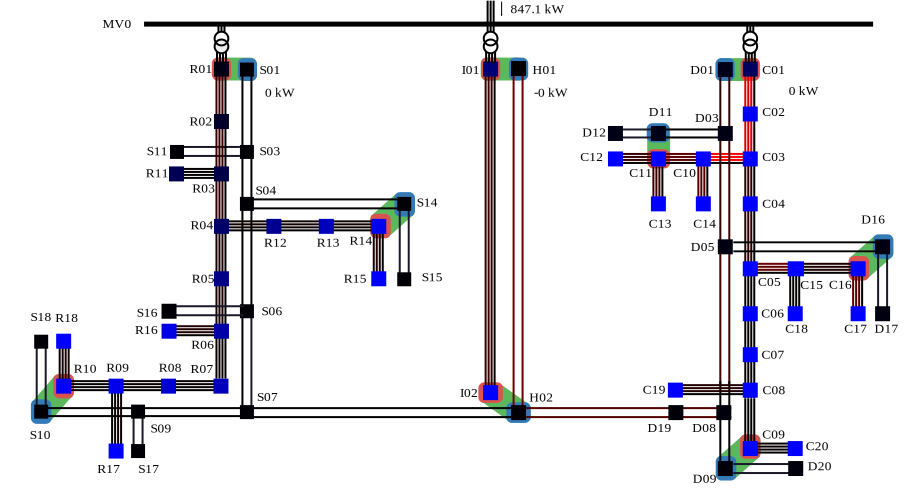

In [11]:
grid_0 = cigre_eu_lv_acdc_class()
grid_0.Dt = 60*60
grid_0.decimation = 1
params = {}
update_loads(0,params)

grid_0.ini(params,'xy_0_case2.json')
grid_0.eval_preconditioner_trap()

times = np.arange(0,26,1)*60*60
t_0 = time.time()
it_p = 0
for t in times:
    h = t/3600
    update_loads(h,params)
    grid_0.sprun(t,params)
    
    it_p += 1
grid_0.post();
print(f'Time elapsed = {time.time() - t_0:0.3f} s, for {len(times)} points.')

Time elapsed = 9.534 s, for 26 points.


In [12]:
fig, axes = plt.subplots(nrows=1,ncols=1, figsize=(5, 3), dpi=100)

i_t_MV0_R01_1_a_r = grid.get_values('i_t_MV0_R01_1_a_r')
i_t_MV0_R01_1_a_i = grid.get_values('i_t_MV0_R01_1_a_i')
S_res = 3*20e3/np.sqrt(3)*np.conj(i_t_MV0_R01_1_a_r+1j*i_t_MV0_R01_1_a_i)
i_t_MV0_I01_1_a_r = grid.get_values('i_t_MV0_I01_1_a_r')
i_t_MV0_I01_1_a_i = grid.get_values('i_t_MV0_I01_1_a_i')
S_ind = 3*20e3/np.sqrt(3)*np.conj(i_t_MV0_I01_1_a_r+1j*i_t_MV0_I01_1_a_i)
i_t_MV0_C01_1_a_r = grid.get_values('i_t_MV0_C01_1_a_r')
i_t_MV0_C01_1_a_i = grid.get_values('i_t_MV0_C01_1_a_i')
S_com = 3*20e3/np.sqrt(3)*np.conj(i_t_MV0_C01_1_a_r+1j*i_t_MV0_C01_1_a_i)

S_total = S_res + S_ind + S_com
axes.plot(Time_com, P_total_ch, label=f'Total',color=colors[3])

axes.plot(grid.Time/3600, S_total.real/1e3)

axes.grid()
axes.set_ylabel('Active Power (kW)')
axes.set_xlabel('Time (h)')
axes.set_xlim([0,24])

axes.legend()
fig.tight_layout()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [13]:
grid.get_values('p_vsc_R10')

array([0., 0., 0., ..., 0., 0., 0.])

In [41]:
fig, axes = plt.subplots(nrows=1,ncols=1, figsize=(5, 3), dpi=100)

axes.plot([0,25], [500]*2,':',color=colors[0])
axes.plot([0,25], [150]*2,':',color=colors[1])
axes.plot([0,25], [300]*2,':',color=colors[2])

axes.plot(Time_res, np.abs(S_res)/1e3,color=colors[0])
axes.plot(Time_ind, np.abs(S_ind)/1e3,color=colors[1])
axes.plot(Time_com, np.abs(S_com)/1e3,color=colors[2])

#axes.plot(Time_com, S_total,color=colors[3],alpha=0.3)
#axes.plot(Time_com, S_total_ch, label=f'Total',color=colors[3])

axes.grid()
axes.set_ylabel('Apparent Power (kVA)')
axes.set_xlabel('Time (h)')
axes.set_xlim([0,24])

axes.legend()
fig.tight_layout()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

No handles with labels found to put in legend.


In [ ]:
tools.get_head_power(grid)

In [100]:
grid_0 = cigre_eu_lv_acdc_class()

params = {}
grid_0.params = params
update_loads(18,grid_0.params)

grid_0.ini(params,'xy_0_case2.json')
grid_0.eval_preconditioner_ini()
update_loads(24,grid_0.params)
grid_0.spini(params)
grid_0.N_iters
grid_0.save_xy_0('xy_0_1.json')

In [35]:
fig, axes = plt.subplots(nrows=1,ncols=1, figsize=(5, 3), dpi=100)

axes.plot(grid.Time/3600, grid.get_values('p_vsc_R10')/1e3,color=colors[0])
axes.plot(grid.Time/3600, grid.get_values('p_vsc_R14')/1e3,color=colors[0])
axes.plot(grid.Time/3600, grid.get_values('p_vsc_I02')/1e3,color=colors[1])
axes.plot(grid.Time/3600, grid.get_values('p_vsc_C09')/1e3,color=colors[2])
axes.plot(grid.Time/3600, grid.get_values('p_vsc_C11')/1e3,color=colors[2])
axes.plot(grid.Time/3600, grid.get_values('p_vsc_C16')/1e3,color=colors[2])


axes.grid()
axes.set_ylabel('Active Power (kW)')
axes.set_xlabel('Time (h)')
axes.set_xlim([0,24])

axes.legend()
fig.tight_layout()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

No handles with labels found to put in legend.


In [1]:
grid.report_u()

NameError: name 'grid' is not defined

In [34]:
s = tools.get_head_power(grid)
print(f'P = {s.real/1000:0.1f} kW')

P = 903.7 kW


In [43]:
300e3/690

434.7826086956522

In [43]:
from cigre_eu_lv_acdc import cigre_eu_lv_acdc_class
import numpy as np
import numba
import cffi
import numba.core.typing.cffi_utils as cffi_support

ffi = cffi.FFI()

import cigre_eu_lv_acdc_cffi as jacs


sp_jac_trap_xy_eval= jacs.lib.sp_jac_trap_xy_eval  

In [ ]:
@numba.njit("float64[:,:](float64[:,:],float64[:],float64[:],float64[:],float64[:],float64)")
def de_jac_trap_eval(de_jac_trap,x,y,u,p,Dt):   
    '''
    Computes the dense full trapezoidal jacobian:
    
    jac_trap = [[eye - 0.5*Dt*Fx_run, -0.5*Dt*Fy_run],
                [             Gx_run,         Gy_run]]
                
    for the given x,y,u,p vectors and Dt time increment.
    
    Parameters
    ----------
    de_jac_trap : (N, N) array_like
                  Input data.
    x : (N_x,) array_like
        Vector with dynamical states.
    y : (N_y,) array_like
        Vector with algebraic states (run problem).
    u : (N_u,) array_like
        Vector with inputs (run problem). 
    p : (N_p,) array_like
        Vector with parameters. 
 
    Returns
    -------
    
    de_jac_trap : (N, N) array_like
                  Updated matrix.    
    
    '''
        
    de_jac_trap_ptr = ffi.from_buffer(np.ascontiguousarray(de_jac_trap))
    x_c_ptr = ffi.from_buffer(np.ascontiguousarray(x))
    y_c_ptr = ffi.from_buffer(np.ascontiguousarray(y))
    u_c_ptr = ffi.from_buffer(np.ascontiguousarray(u))
    p_c_ptr = ffi.from_buffer(np.ascontiguousarray(p))

    de_jac_trap_num_eval(de_jac_trap_ptr,x_c_ptr,y_c_ptr,u_c_ptr,p_c_ptr,Dt)
    de_jac_trap_up_eval( de_jac_trap_ptr,x_c_ptr,y_c_ptr,u_c_ptr,p_c_ptr,Dt)
    de_jac_trap_xy_eval( de_jac_trap_ptr,x_c_ptr,y_c_ptr,u_c_ptr,p_c_ptr,Dt)
    
    return de_jac_trap